In [1]:
import scipy
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
%matplotlib inline
pd.options.display.max_rows = 999

In [2]:
crime_in_sf = pd.read_csv('SF_crime/train.csv')

In [3]:
category_list = ['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT', 'VANDALISM', 'NON-CRIMINAL', 
                 'ROBBERY', 'ASSAULT', 'WEAPON LAWS', 'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS', 
                 'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY', 'SECONDARY CODES', 
                 'TRESPASS', 'MISSING PERSON', 'FRAUD', 'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE', 
                 'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT', 'ARSON', 'FAMILY OFFENSES', 
                 'LIQUOR LAWS', 'BRIBERY', 'EMBEZZLEMENT', 'SUICIDE', 'LOITERING', 'SEX OFFENSES NON FORCIBLE', 
                 'EXTORTION', 'GAMBLING', 'BAD CHECKS', 'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT']

resolution_list = ['ARREST, BOOKED', 'NONE', 'ARREST, CITED', 'PSYCHOPATHIC CASE', 'JUVENILE BOOKED', 'UNFOUNDED', 
                   'EXCEPTIONAL CLEARANCE', 'LOCATED', 'CLEARED-CONTACT JUVENILE FOR MORE INFO', 'NOT PROSECUTED', 
                   'JUVENILE DIVERTED', 'COMPLAINANT REFUSES TO PROSECUTE', 'JUVENILE ADMONISHED', 'JUVENILE CITED', 
                   'DISTRICT ATTORNEY REFUSES TO PROSECUTE', 'PROSECUTED BY OUTSIDE AGENCY', 
                   'PROSECUTED FOR LESSER OFFENSE']

After importing the data and looking at the length of the information present I decided to seperate the dataframe into sub-categories by similar crimes.

In [4]:
crime_in_sf.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [5]:
len(crime_in_sf.Y.unique())

34243

In [6]:
crime_in_sf.columns.values

array(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'], dtype=object)

In [7]:
category_df = pd.get_dummies(crime_in_sf.Category)
resolution_df = pd.get_dummies(crime_in_sf.Resolution)
resolution_df_no_none = resolution_df[['ARREST, BOOKED', 'ARREST, CITED', 'CLEARED-CONTACT JUVENILE FOR MORE INFO', 
               'COMPLAINANT REFUSES TO PROSECUTE', 'DISTRICT ATTORNEY REFUSES TO PROSECUTE', 'EXCEPTIONAL CLEARANCE', 
               'JUVENILE ADMONISHED', 'JUVENILE BOOKED', 'JUVENILE CITED', 'JUVENILE DIVERTED', 'LOCATED', 
               'NOT PROSECUTED', 'PROSECUTED BY OUTSIDE AGENCY', 'PROSECUTED FOR LESSER OFFENSE', 'PSYCHOPATHIC CASE', 
               'UNFOUNDED']]
day_of_week_df = pd.get_dummies(crime_in_sf.DayOfWeek)
pd_district_df = pd.get_dummies(crime_in_sf.PdDistrict)

In [8]:
category_df.join(resolution_df)
category_df.join(day_of_week_df)
crime_in_sf_k = category_df.join(pd_district_df)


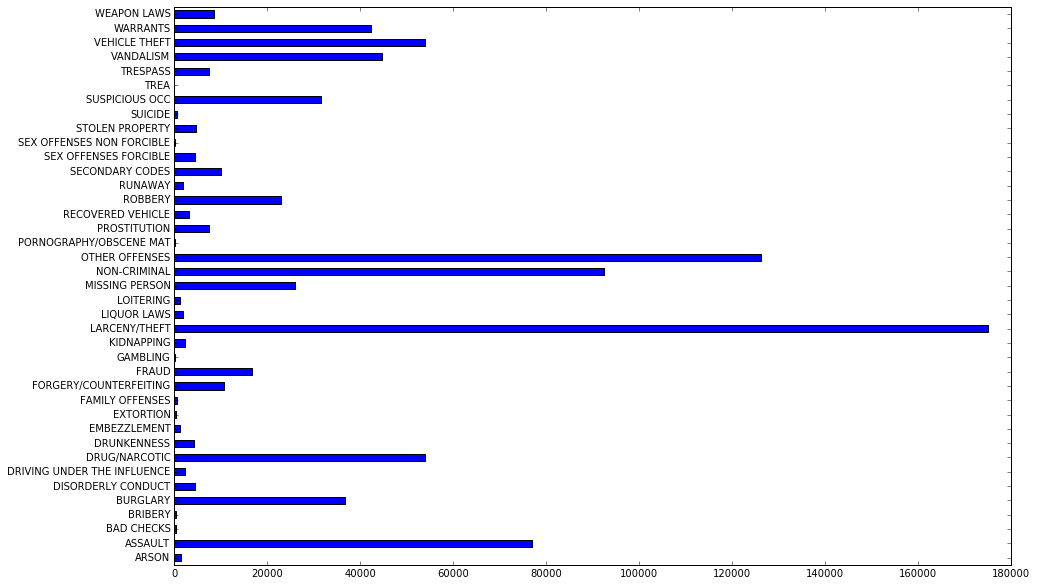

In [9]:
category_df.sum().plot(kind='barh', figsize=(15,10))

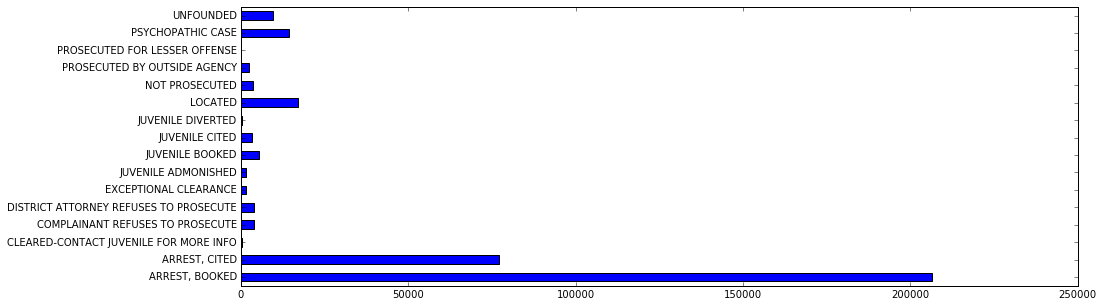

In [10]:
resolution_df_no_none.sum().plot(kind='barh', figsize=(15,5))

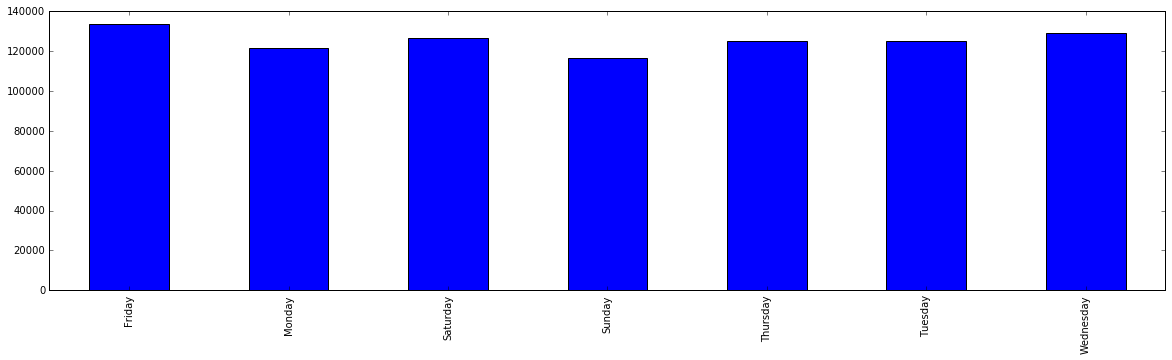

In [11]:
day_of_week_df.sum().plot(kind='bar', figsize=(20,5))

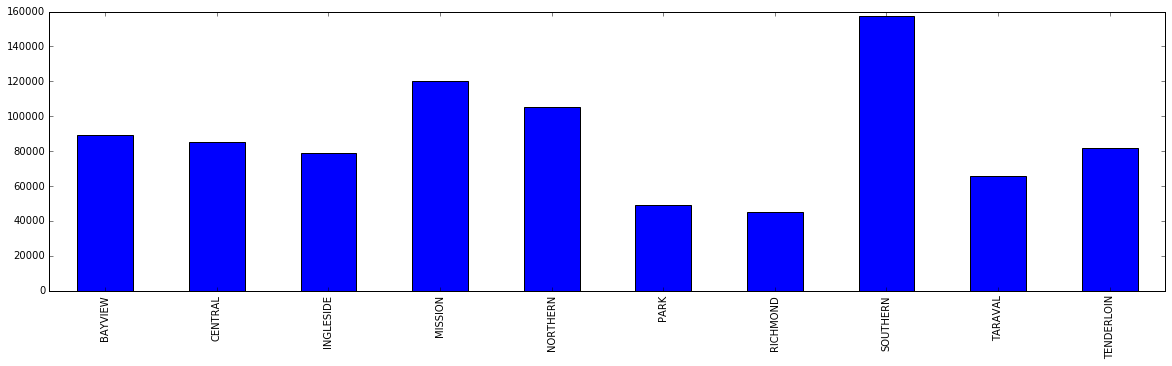

In [12]:
pd_district_df.sum().plot(kind='bar', figsize=(20,5))

In [18]:
pca = PCA(n_components=2)
pca.fit(crime_in_sf_k)
reduced_crime_in_sf = pca.transform(crime_in_sf_k)
kmeans = KMeans(8)

In [19]:
crime_in_sf_pred = kmeans.fit_predict(reduced_crime_in_sf)

<function matplotlib.pyplot.show>

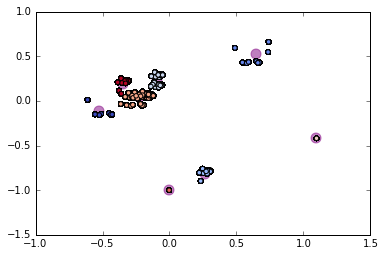

In [20]:
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], alpha=.5, s=100, color="purple")
plt.scatter(reduced_crime_in_sf[:, 0], reduced_crime_in_sf[:, 1], c=crime_in_sf_pred, cmap="coolwarm")
plt.show

In [21]:
crime_in_sf['Kgroup'] = crime_in_sf_pred
crime_in_sf = crime_in_sf.sort("Kgroup")

/Users/MatthewBarnette/final_project_2/.direnv/python-3.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [22]:
crime_in_sf

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Kgroup
382789,2010-01-11 05:05:00,ASSAULT,BATTERY,Monday,SOUTHERN,"ARREST, BOOKED",0 Block of 6TH ST,-122.409011,37.781134,0
172548,2013-01-27 06:00:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Sunday,PARK,NONE,HAIGHT ST / BAKER ST,-122.440360,37.770848,0
221985,2012-05-28 22:12:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Monday,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,0
594656,2006-12-11 03:00:00,FRAUD,DEFRAUDING AN INNKEEPER,Monday,MISSION,"ARREST, BOOKED",2600 Block of MISSION ST,-122.418600,37.754626,0
619342,2006-07-29 13:00:00,NON-CRIMINAL,LOST PROPERTY,Saturday,NORTHERN,NONE,300 Block of BUCHANAN ST,-122.427278,37.772754,0
367023,2010-04-06 16:55:00,OTHER OFFENSES,"TRAFFIC COLLISION, HIT & RUN, PROPERTY DAMAGE",Tuesday,PARK,NONE,1800 Block of HAYES ST,-122.446916,37.773886,0
594652,2006-12-11 03:40:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,CENTRAL,"ARREST, CITED",SUTTER ST / KEARNY ST,-122.403847,37.789828,0
581453,2007-02-21 08:00:00,MISSING PERSON,MISSING JUVENILE,Wednesday,CENTRAL,NONE,600 Block of FRANCISCO ST,-122.415579,37.804471,0
594785,2006-12-03 18:00:00,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,PARK,"ARREST, BOOKED",0 Block of CASTRO ST,-122.435637,37.768169,0
581441,2007-02-21 09:00:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,CENTRAL,NONE,200 Block of NORTHPOINT ST,-122.411346,37.806913,0
